## IMPORTING ALL LIBRARIES

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Input
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19,VGG16
from tensorflow.keras.models import Model

2024-06-03 15:56:18.084668: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 15:56:18.084782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 15:56:18.271080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## CREATING THE TRAINING AND VALIDATION DATASET USING IMAGEDATAGENERATOR

In [2]:
generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1
)

In [3]:
train_data = generator.flow_from_directory(
    "/kaggle/input/face-recognition-dataset/Original Images/Original Images",
    target_size=(224, 224),
    batch_size=32,
    subset="training" ,
)

Found 2318 images belonging to 31 classes.


In [4]:
val_data= generator.flow_from_directory(
    "/kaggle/input/face-recognition-dataset/Original Images/Original Images",
    target_size=(224,224),
    batch_size=32,
    subset="validation"
)

Found 244 images belonging to 31 classes.


In [6]:
targets = list(train_data.class_indices.keys())

## LOADING VGG16 MODEL

In [7]:
vgg = VGG16(input_shape=[224,224,3], weights='imagenet', include_top=False)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## MODEL CREATION

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(31, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 31)             │       777,759 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,492,447 (59.10 MB)

 Trainable params: 777,759 (2.97 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## MODEL TRAINING

In [10]:
history = model.fit(train_data, epochs=25, validation_data=val_data, batch_size=16)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/73 ━━━━━━━━━━━━━━━━━━━━ 45:21 38s/step - accuracy: 0.0312 - loss: 3.8051

I0000 00:00:1717430268.349294     127 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717430268.368268     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1032 - loss: 4.0792

W0000 00:00:1717430349.891783     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


73/73 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.1041 - loss: 4.0716 - val_accuracy: 0.2049 - val_loss: 3.1464
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 66s 825ms/step - accuracy: 0.3902 - loss: 2.2544 - val_accuracy: 0.3156 - val_loss: 2.5585
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 66s 814ms/step - accuracy: 0.5006 - loss: 1.7899 - val_accuracy: 0.3361 - val_loss: 2.5205
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 63s 771ms/step - accuracy: 0.5708 - loss: 1.4580 - val_accuracy: 0.3361 - val_loss: 2.3281
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 63s 787ms/step - accuracy: 0.6054 - loss: 1.3591 - val_accuracy: 0.3811 - val_loss: 2.3342
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 63s 785ms/step - accuracy: 0.6603 - loss: 1.1804 - val_accuracy: 0.4180 - val_loss: 2.2835
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 63s 785ms/step - accuracy: 0.6929 - loss: 1.0580 - val_accuracy: 0.4467 - val_loss: 2.2103
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 62s 782ms/step - accuracy: 0.7030 - loss: 1.0189 - val_accuracy: 0.4057 

## EVALUATING MODEL ON TRAINING AND VALIDATION DATASET

In [13]:
print(f"Training loss, training accuracy: ",model.evaluate(train_data))
print(f"validation loss, training accuracy: ",model.evaluate(val_data))

73/73 ━━━━━━━━━━━━━━━━━━━━ 53s 726ms/step - accuracy: 0.8818 - loss: 0.3574
Training loss, training accuracy:  [0.36652418971061707, 0.8826574683189392]
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 783ms/step - accuracy: 0.4134 - loss: 2.5840
validation loss, training accuracy:  [2.470447540283203, 0.4262295067310333]


## VISUALISING THE RESULT

In [11]:
import matplotlib.pyplot as plt

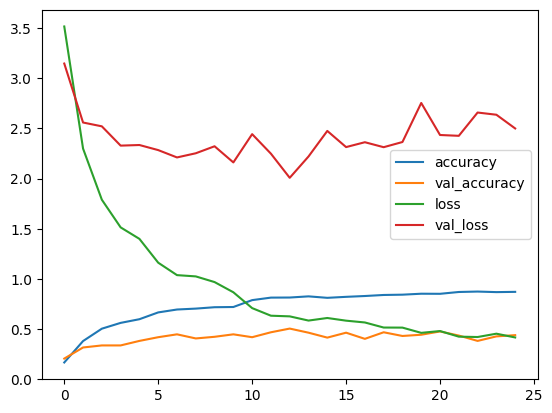

In [16]:
plt.plot(history.history['accuracy'],label="accuracy")
plt.plot(history.history['val_accuracy'],label="val_accuracy")
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.legend()